In [3]:
from sklearn.cluster import KMeans

from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np
from tqdm import tqdm
import cv2

In [4]:
def average_image_color(filename):
    i = Image.open(filename)
    h = i.histogram()

    # split into red, green, blue
    r = h[0:256]
    g = h[256:256*2]
    b = h[256*2: 256*3]

    # perform the weighted average of each channel:
    # the *index* is the channel value, and the *value* is its weight
    return (
        sum( i*w for i, w in enumerate(r) ) / sum(r),
        sum( i*w for i, w in enumerate(g) ) / sum(g),
        sum( i*w for i, w in enumerate(b) ) / sum(b)
        )

# if __name__ == '__main__':
#     import sys
#     if len(sys.argv) > 1:
#         print average_image_color(sys.argv[1])
#     else:
#         print 'usage: average_image_color.py FILENAME'
#         print 'prints the average color of the image as (R,G,B) where R,G,B are between 0 and 255.'

In [5]:
PATH = 'D:\Pics\Bageshwar'
os.chdir(PATH)

In [6]:
avg = {}
for file in tqdm(os.listdir()):
    avg_rgb_color = average_image_color(file)
    color_mean = np.array(avg_rgb_color).mean()
    avg[file] = color_mean

100%|████████████████████████████████████████████████████████████████████████████████| 184/184 [00:08<00:00, 21.39it/s]


In [7]:
sorted_avg = {k:v for k,v in sorted(avg.items(), key=lambda item: item[1])}

In [8]:
images = []
for file in tqdm(sorted_avg.keys()):
    img = plt.imread(file)
    img = cv2.resize(img, (50, 50))
    images.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 184/184 [00:07<00:00, 23.95it/s]


10it [00:00, 50.85it/s]


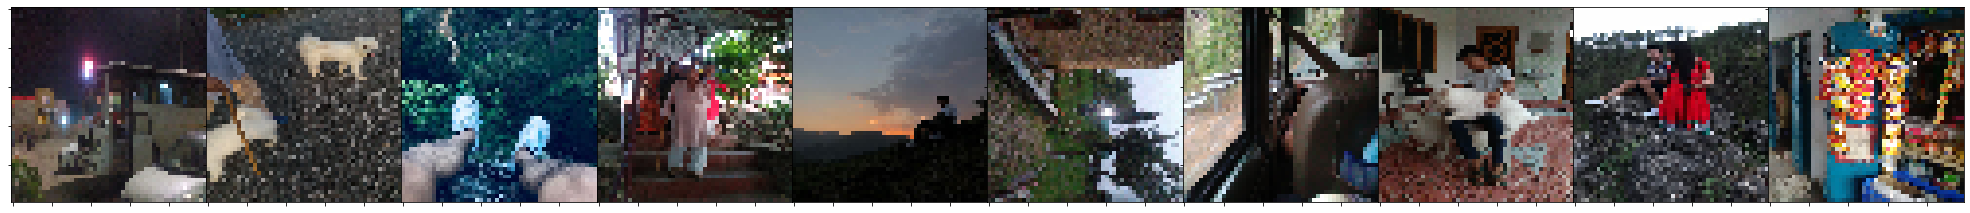

In [18]:
x = 10
total = len(images[:x])

plt.figure(figsize=(35, 15))
for idx, img in tqdm(enumerate(images[:x])):
    idx += 1    
    ax1 = plt.subplot(1, total, idx)
    plt.imshow(img)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

#     break

In [64]:
len(images)

184

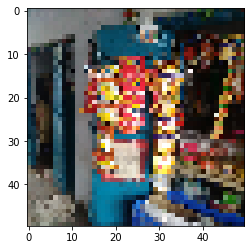

In [20]:
plt.imshow(img)

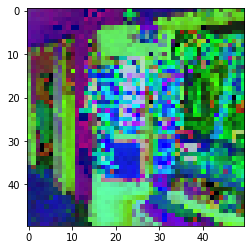

In [31]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img1)

In [33]:
def get_dominant_color(image, k=4, image_processing_size = None):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input

    >>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
    [56.2423442, 34.0834233, 70.1234123]
    """
    #resize image if new dims provided
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    return list(dominant_color)

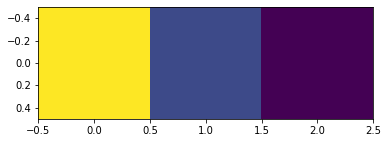

In [47]:
c = get_dominant_color(img)
r,g,b = c
c = np.array((r,g,b))

plt.imshow([c])

In [45]:
c.mean()

30.343326195574985